In [1]:
%pylab inline
from utils import *
from data import *
from scoring import *

Populating the interactive namespace from numpy and matplotlib


# Some general notes

* The data has been perpared by running add_measures.py, which adds avg and stddev of speed and course for various sizes of a rolling window (from 30min to 24h).

* **We use a random forests**

* We determine, for each gear type, what the optimal window size is by running the regression for each window size and a fixed polynomial degree.


# Longliners
## Longliners using Alex' data
Train the algorithm using Alex' data, then evaluate on both Alex' and Kristinas data

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.0258682273853, cross=0.144374800914
3600: Fitting... Scoring... Calc.err... train=0.0249851931027, cross=0.137873896004
10800: Fitting... Scoring... Calc.err... train=0.0207522845378, cross=0.113300216211
21600: Fitting... Scoring... Calc.err... train=0.01839436, cross=0.1048593
43200: Fitting... Scoring... Calc.err... train=0.01782858, cross=0.10329376
86400: Fitting... Scoring... Calc.err... train=0.01970078, cross=0.1074854


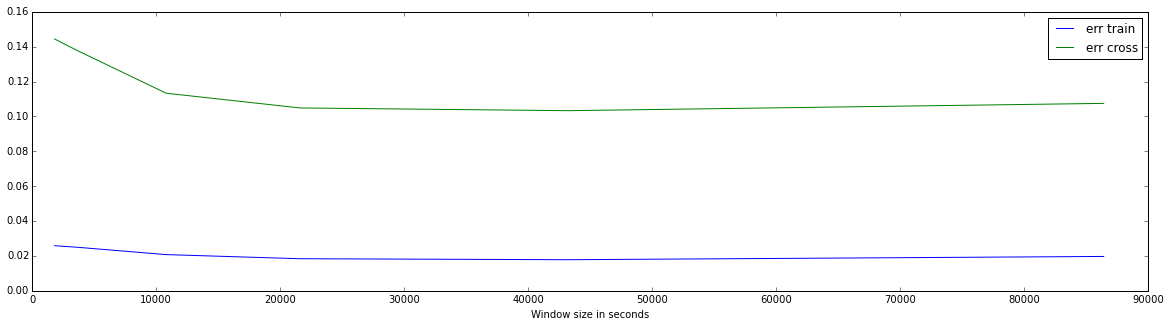

Best window size: 43200
Evaluation using Alex' data:


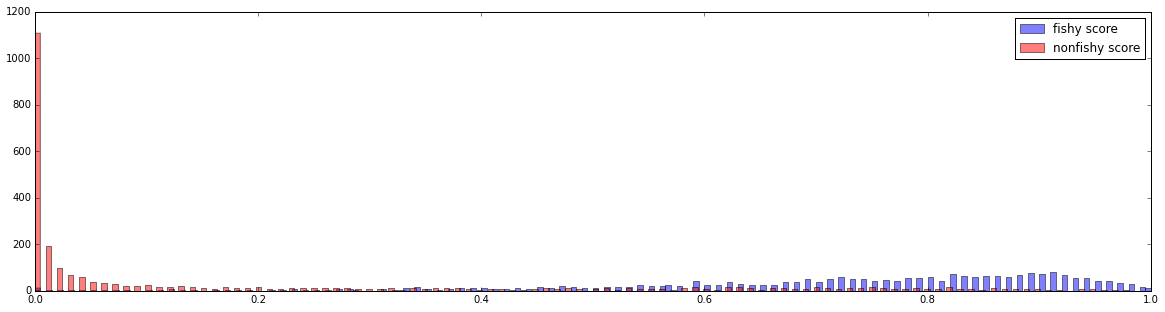

Squared numerical error: 0.103381
Error (overlap): 10.16%
False positives given cutoff at 0.5: 0.846805234796%


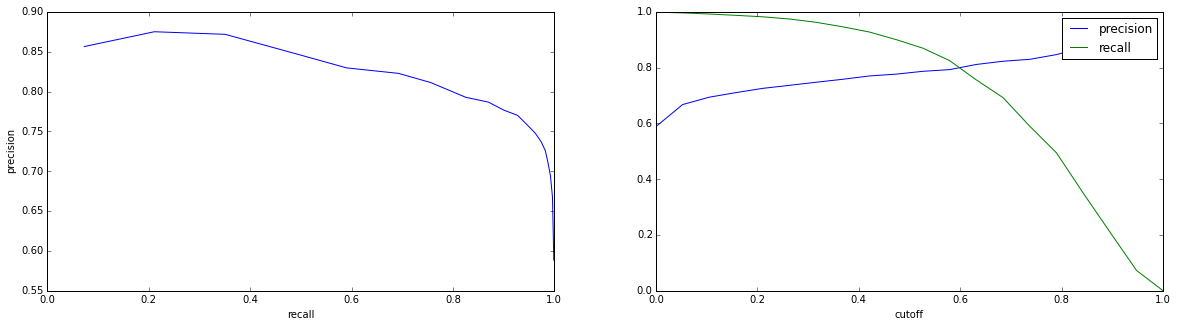

Score window: [43200]
Evaluate using Kristinas data:


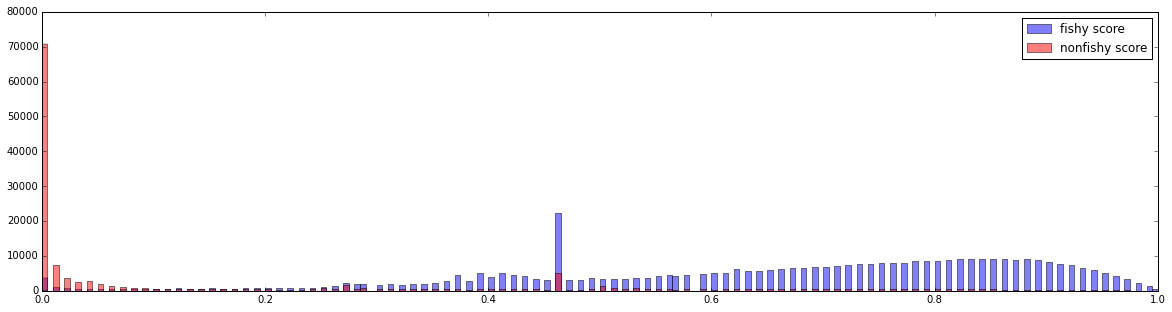

Squared numerical error: 0.149149184905
Error (overlap): 19.230418048%
False positives given cutoff at 0.5: 11.8255840946%


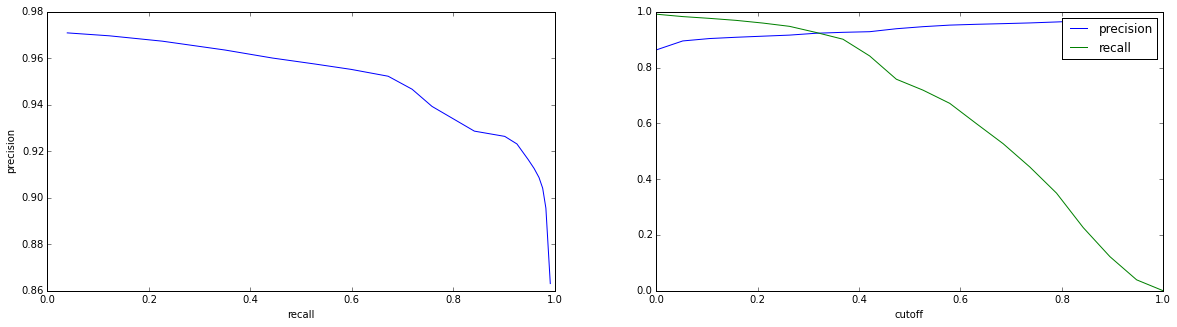

Score window: [43200]


In [2]:
x, xtrain, xcross, xtest = load_dataset('classified-filtered.npz')
_x, _xtrain, _xcross, _xtest = load_dataset('datasets/kristina_longliner.measures.npz')
min_window = optimize_window_size(xtrain, xcross)
print "Evaluation using Alex' data:"
evaluate_score(xtrain, xtest, [min_window])
print "Evaluate using Kristinas data:"
evaluate_score(xtrain, _x, [min_window])

# Longliners using Kristinas' data
Train the algorithm using Kristinas data, and evaluate using a separate subset of Kristinas data.

In [3]:
x, xtrain, xcross, xtest = load_dataset('datasets/kristina_longliner.measures.npz')

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.0306583956281, cross=0.13034201871
3600: Fitting... Scoring... Calc.err... train=0.0265702695965, cross=0.12809866335
10800: Fitting... Scoring... Calc.err... train=0.0173169261974, cross=0.107164883349
21600: Fitting... Scoring... Calc.err... train=0.0147460916363, cross=0.102677214697
43200: Fitting... Scoring... Calc.err... train=0.01236216, cross=0.09141624
86400: Fitting... Scoring... Calc.err... train=0.01139544, cross=0.08764144


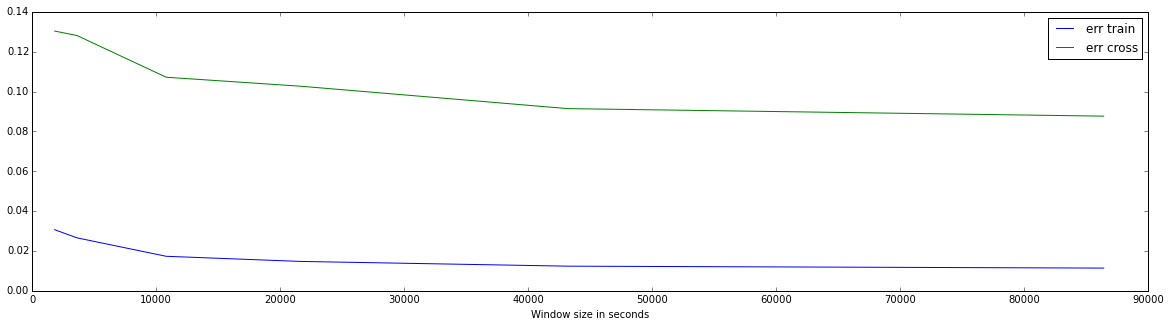

Best window size: 86400


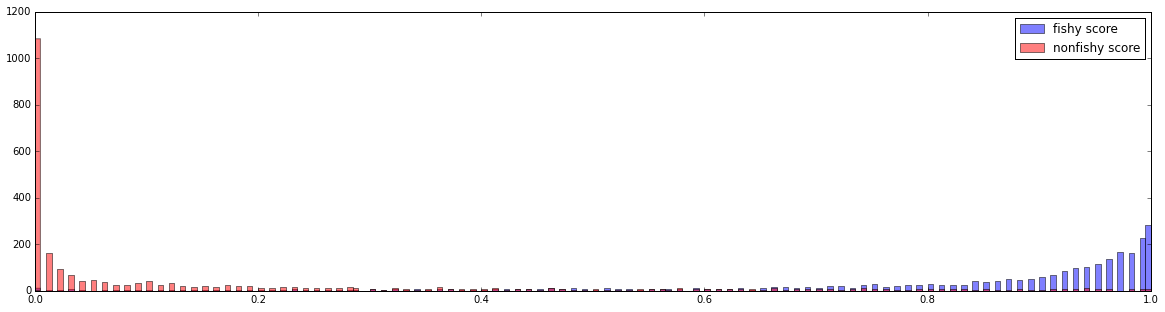

Squared numerical error: 0.08291562
Error (overlap): 21.64%
False positives given cutoff at 0.5: 23.754789272%


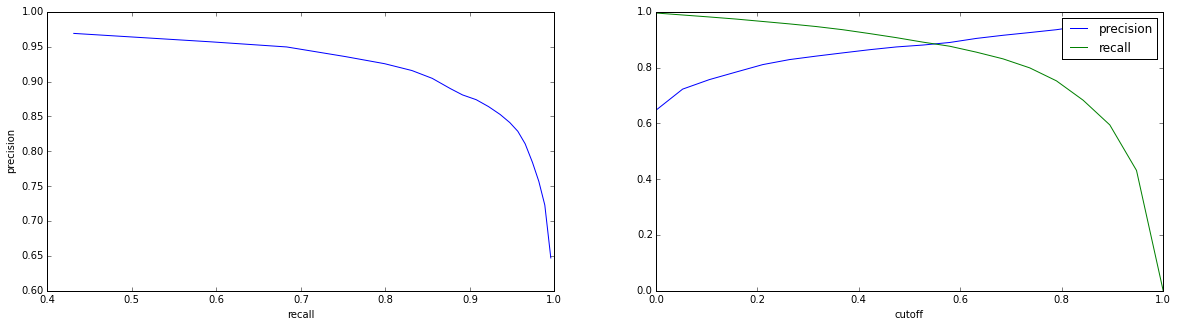

Score window: [86400]


In [4]:
min_window = optimize_window_size(xtrain, xcross)
evaluate_score(xtrain, xtest, [min_window])

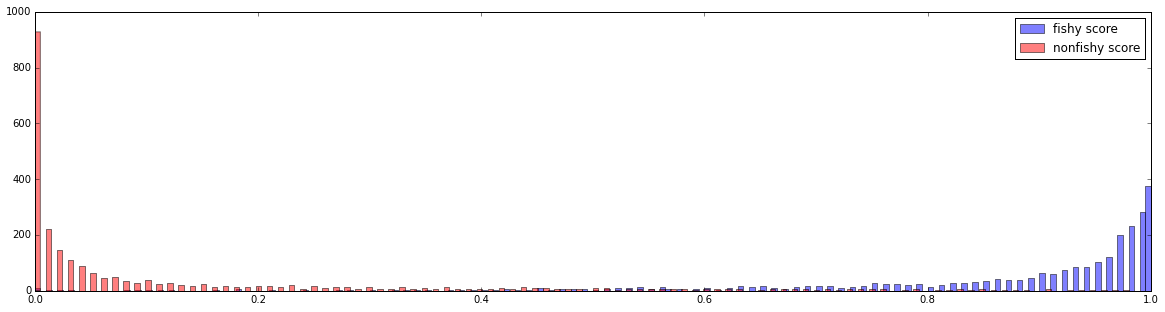

Squared numerical error: 0.0554672
Error (overlap): 5.76%
False positives given cutoff at 0.5: 0.988969189806%


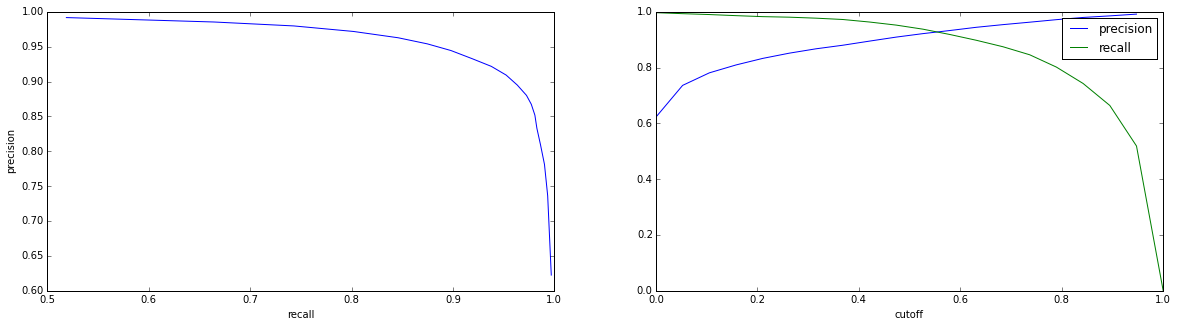

Score window: [1800, 3600, 10800, 21600, 43200, 86400]


In [5]:
evaluate_score(xtrain, xtest, [1800, 3600, 10800, 21600, 43200, 86400])

# Diferences between the datasets
How does the two labeled datasets differ in their labeleing? Alex only has labeled data for longliners, so that's what we'll compare:

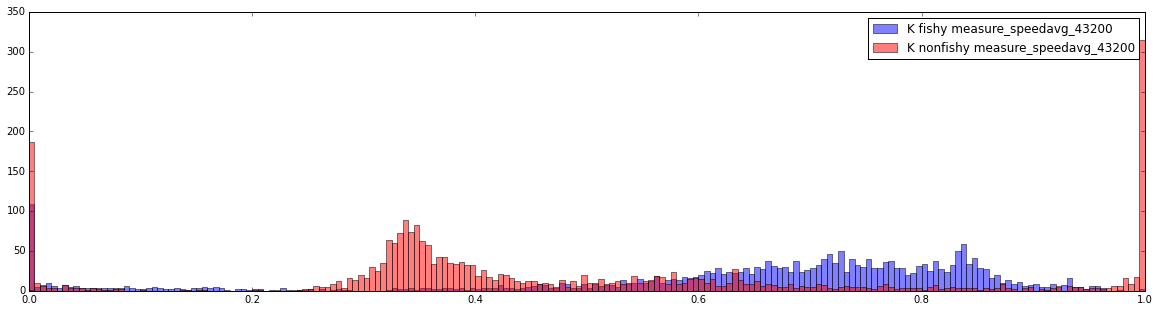

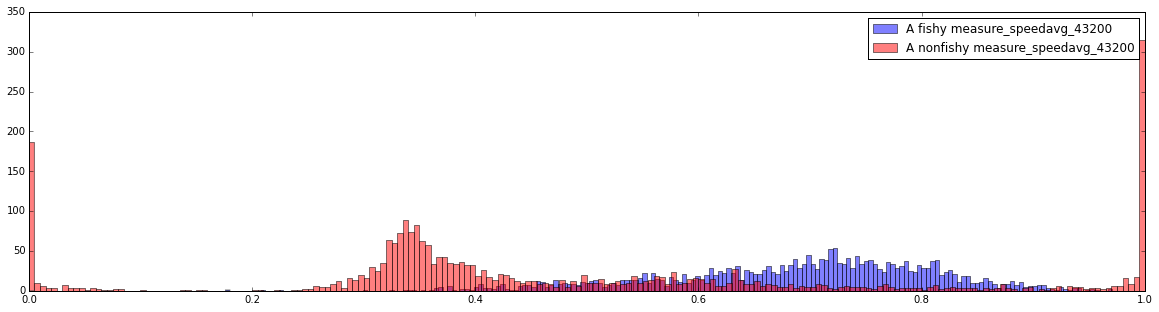

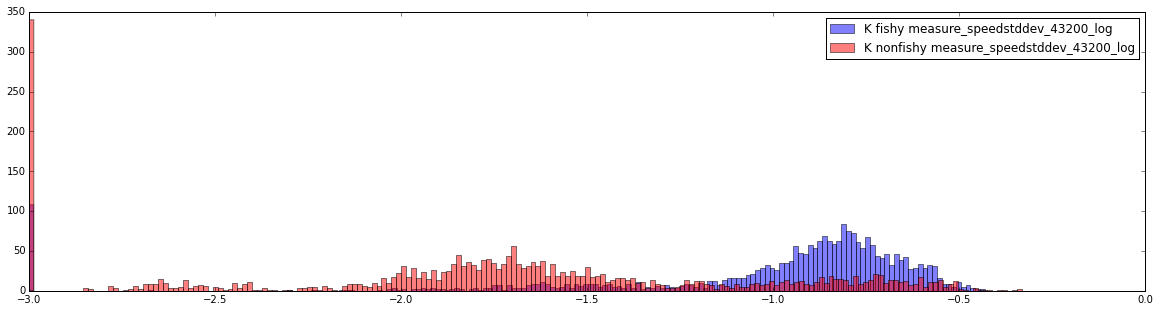

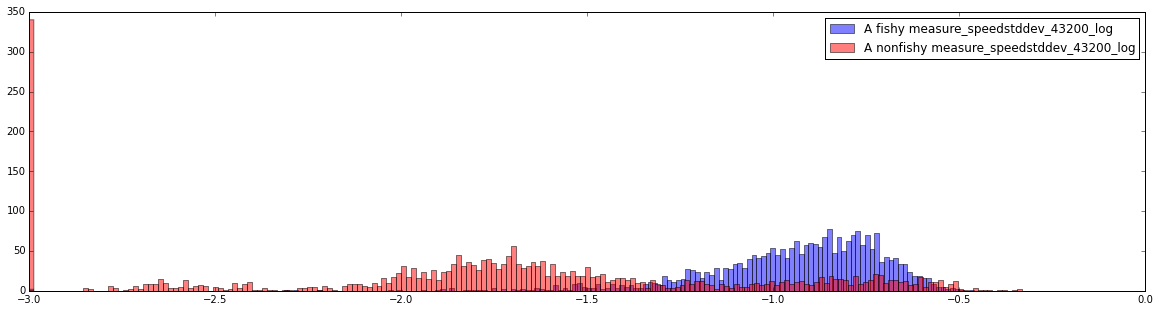

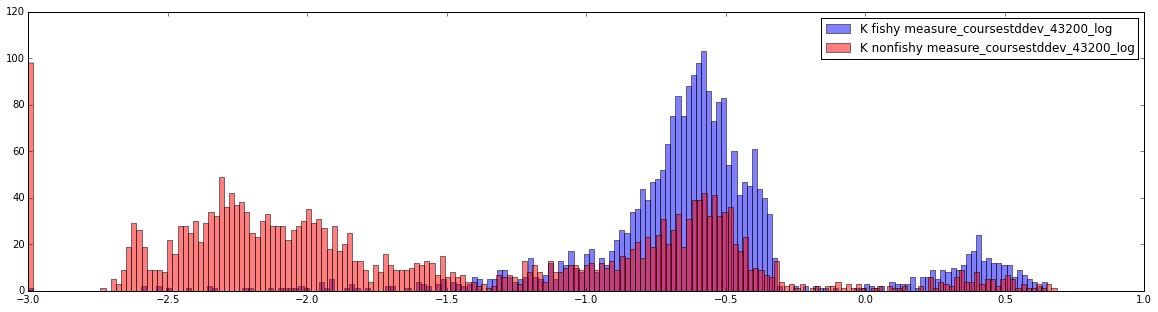

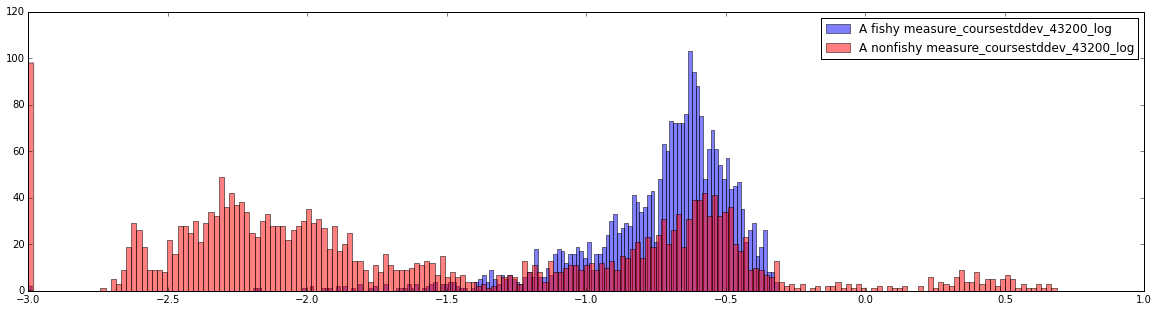

In [6]:
_x, _xtrain, _xcross, _xtest = load_dataset('classified-filtered.npz')
x, xtrain, xcross, xtest = load_dataset('datasets/kristina_longliner.measures.npz')

xfishy = fishy(xtest)
xnonfishy = nonfishy(xtest)
_xfishy = fishy(_xtest)
_xnonfishy = nonfishy(xtest)
window = 43200
for col in ('measure_speedavg_%s' % window,
        'measure_speedstddev_%s_log' % window,
        'measure_coursestddev_%s_log' % window):
    figure(figsize=(20,5))
    hist(xfishy[col], bins=200, normed=False, color='b', alpha=0.5, label="K fishy " + col)
    hist(xnonfishy[col], bins=200, normed=False, color='r', alpha=0.5, label="K nonfishy " + col)
    legend()
    show()

    figure(figsize=(20,5))
    hist(_xfishy[col], bins=200, normed=False, color='b', alpha=0.5, label="A fishy " + col)
    hist(_xnonfishy[col], bins=200, normed=False, color='r', alpha=0.5, label="A nonfishy " + col)
    legend()
    show()

# Trawlers

In [7]:
x, xtrain, xcross, xtest = load_dataset('datasets/kristina_trawl.measures.npz')

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.0219800301997, cross=0.115242896586
3600: Fitting... Scoring... Calc.err... train=0.0195778602081, cross=0.1091222832
10800: Fitting... Scoring... Calc.err... train=0.0161617931643, cross=0.106898054334
21600: Fitting... Scoring... Calc.err... train=0.0152590849125, cross=0.109710046489
43200: Fitting... Scoring... Calc.err... train=0.01699138, cross=0.1204738
86400: Fitting... Scoring... Calc.err... train=0.01816333, cross=0.12813708


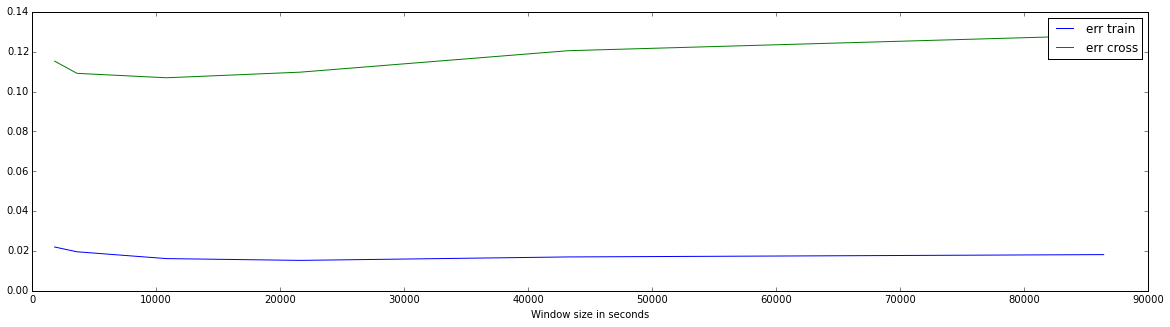

Best window size: 10800


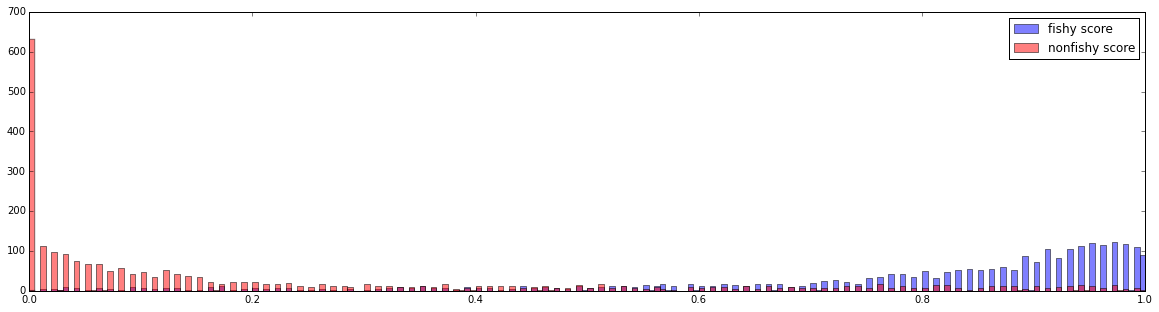

Squared numerical error: 0.1122790387
Error (overlap): 29.08%
False positives given cutoff at 0.5: 32.6816672814%


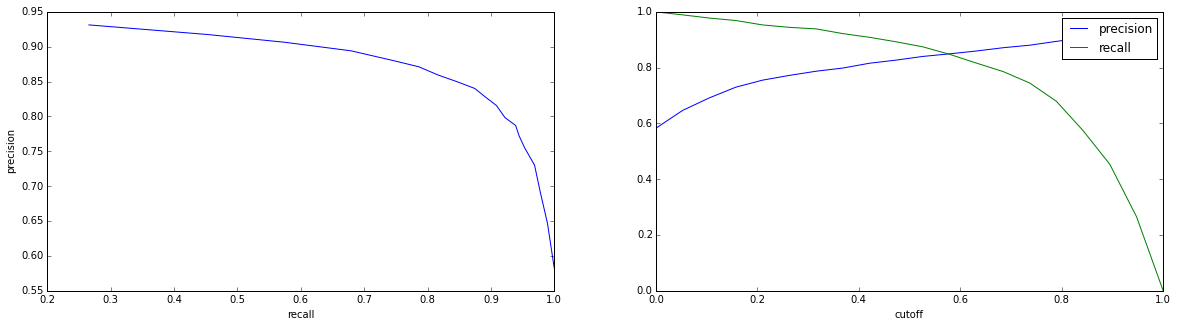

Score window: [10800]


In [8]:
min_window = optimize_window_size(xtrain, xcross)
evaluate_score(xtrain, xtest, [min_window])

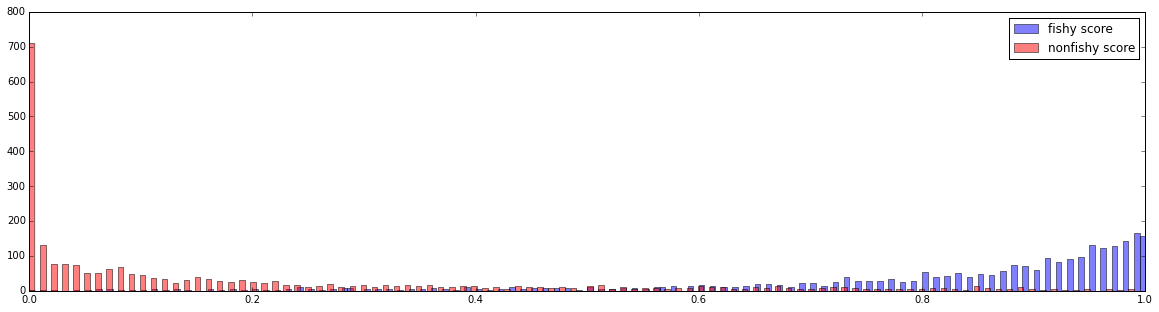

Squared numerical error: 0.0853348
Error (overlap): 9.28%
False positives given cutoff at 0.5: 1.42056074766%


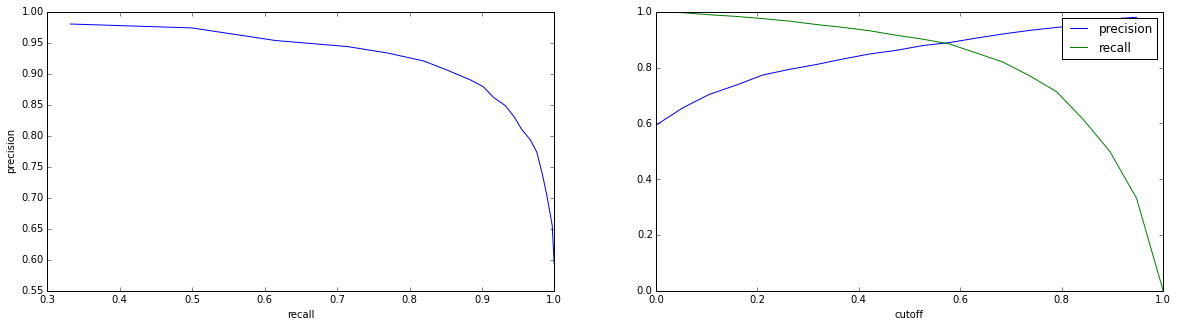

Score window: [1800, 3600, 10800, 21600, 43200, 86400]


In [9]:
evaluate_score(xtrain, xtest, [1800, 3600, 10800, 21600, 43200, 86400])

# Purse seiners

In [10]:
x, xtrain, xcross, xtest = load_dataset('datasets/kristina_ps.measures.npz')

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.0173605237562, cross=0.0836464869715
3600: Fitting... Scoring... Calc.err... train=0.0153619055901, cross=0.0795200885196
10800: Fitting... Scoring... Calc.err... train=0.0126197227608, cross=0.0823640843552
21600: Fitting... Scoring... Calc.err... train=0.0124516831281, cross=0.0852575201865
43200: Fitting... Scoring... Calc.err... train=0.013851578423, cross=0.0984242365532
86400: Fitting... Scoring... Calc.err... train=0.01275226, cross=0.08986494


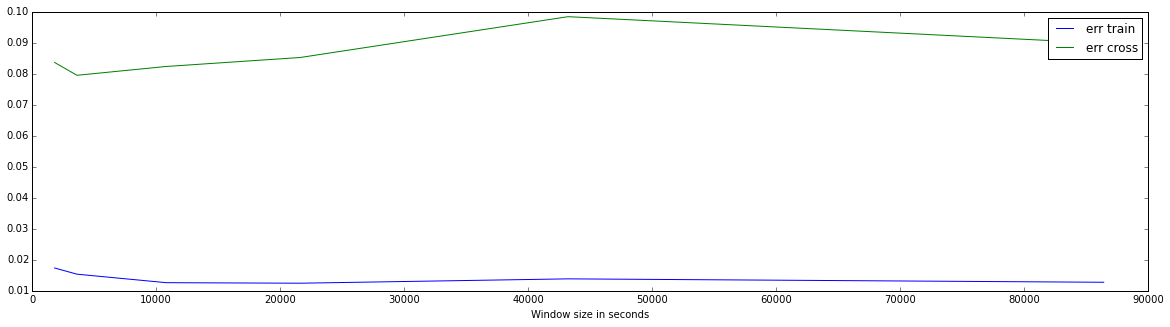

Best window size: 3600


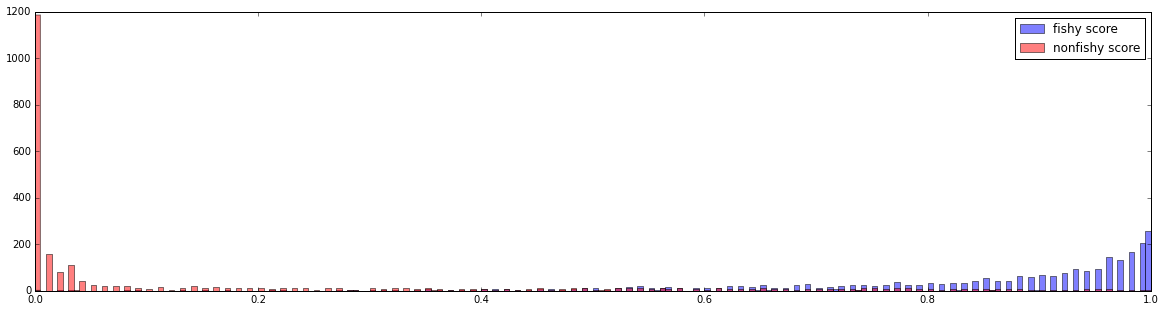

Squared numerical error: 0.0789314787825
Error (overlap): 21.0%
False positives given cutoff at 0.5: 27.7539341917%


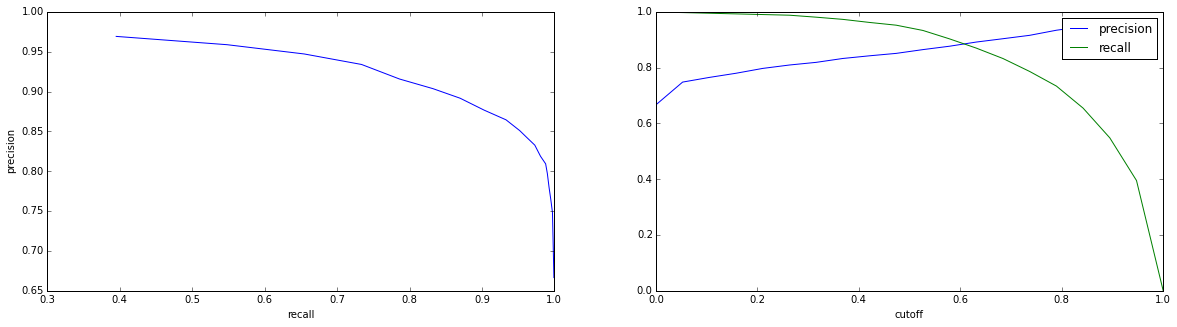

Score window: [3600]


In [11]:
import imp, scoring
imp.reload(scoring)
from scoring import *
min_window = optimize_window_size(xtrain, xcross)
evaluate_score(xtrain, xtest, [min_window])

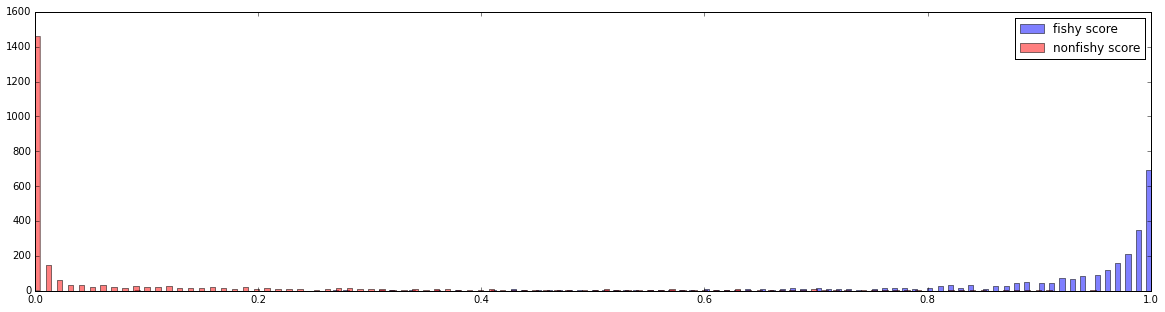

Squared numerical error: 0.0349687
Error (overlap): 3.88%
False positives given cutoff at 0.5: 4.86526946108%


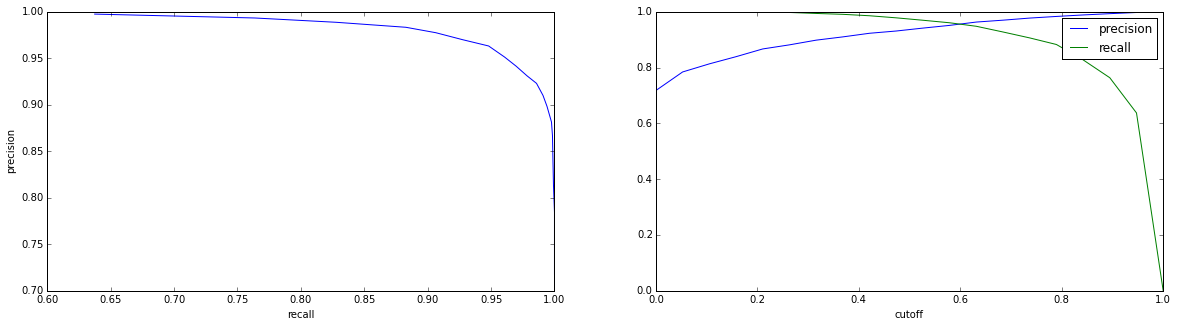

Score window: [1800, 3600, 10800, 21600, 43200, 86400]


In [12]:
evaluate_score(xtrain, xtest, [1800, 3600, 10800, 21600, 43200, 86400])